# Co-integration analysis of CNQ and PXD

In [1]:
import statsmodels.tsa.stattools as sts
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

In [2]:
# importing data
# Canadian Natural Resources - CNQ
# Pioneer Natural Resources Company - PXD
co1 = 'CNQ'
co2 = 'PXD'
tickers = co1 + " " + co2
raw_data = yfinance.download (tickers = tickers, interval = '1d', group_by = 'ticker',
                              auto_adjust = True, treads = True)

[*********************100%***********************]  2 of 2 completed


In [3]:
# defining interval for analysis
start = '2014-01-01'
end = '2016-06-01'

In [4]:
cnq = pd.DataFrame(raw_data[co1][start:end].Close)
pxd = pd.DataFrame(raw_data[co2][start:end].Close)

In [5]:
# filling data gaps
cnq = cnq.fillna(method = 'bfill')
pxd = pxd.fillna(method = 'bfill')

In [6]:
# renaming columns
cnq = cnq.rename(columns = {'Close': 'CNQ'})
pxd = pxd.rename(columns = {'Close': 'PXD'})

In [7]:
# normalizing data
cnq = cnq.apply(lambda x: (x-x.min())/(x.max()-x.min()))
pxd = pxd.apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [8]:
# charting prices
chart = pd.concat([cnq, pxd], axis = 1)

[]

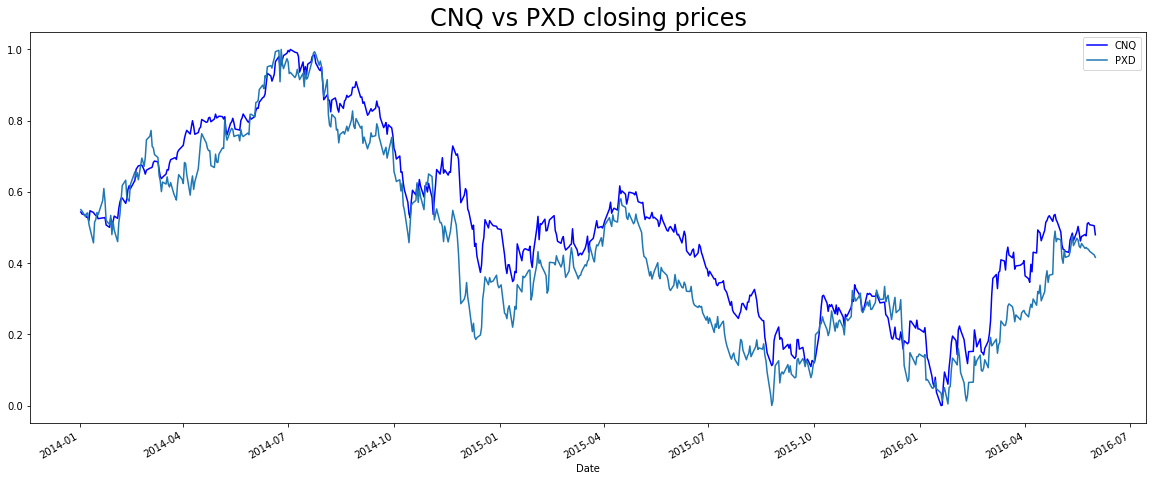

In [9]:
chart['CNQ'].plot(figsize = (20,8), color = 'blue')
chart['PXD'].plot()
plt.title('CNQ vs PXD closing prices', size = 24)
plt.legend()
plt.plot()

In [10]:
# co-integration test
sts.coint(cnq, pxd)

(-4.495765077156234,
 0.0012444420134370715,
 array([-3.91457366, -3.34621458, -3.05144453]))

#### From 2014 to july 2016, the co-integration between these stocks were really strong (p-value = 0.0012)

# Pairs Check Strategy

In [11]:
# calculate the spread
spread = cnq['CNQ'] - pxd['PXD']

In [12]:
# zscore function
def zscore(spread):
    return (spread - spread.mean())/(np.std(spread))

Text(0.5, 1.0, 'Z-score of the spread and thresholds for trading')

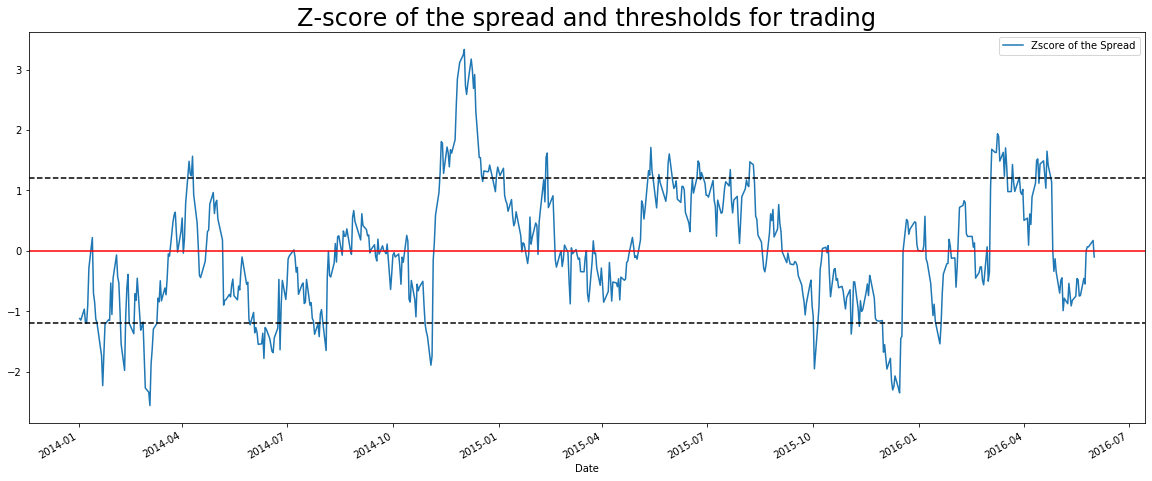

In [13]:
# charting
z_score = zscore(spread)
z_score.plot(label = 'Zscore of the Spread', figsize = (20,8))
plt.axhline(z_score.mean(), color = 'r')
plt.axhline(1.2, ls = '--', color = 'black')
plt.axhline(-1.2, ls = '--', color = 'black')
plt.legend()
plt.title('Z-score of the spread and thresholds for trading', size = 24)

### Pairs Check Strategy
The strategy consists of going short/long on CNQ/PXD when the zscore breaks the 1.2 threshold. 
Conversally, the algorithm will go long/short on CNQ/PXD when the zscore breaks the -1.2 threshold.
The choice of +-1.2 as trading triggers was done empirically.
The adoption of different limits can yield different returns.